In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Tujuan Pengolahan

Memprediksi apakah berbagai transaksi yang tercatat adalah fraud atau tidak dengan menggunakan model machine learning logistic regression, decision tree , random forest dan menilai performa dari ketiga model machine learning tersebut.

### Atribut Informasi

1. accountNumber = The account number of the customer
2. customerId = The id of the customer
3. creditLimit =  the amount of money that can be charged to the credit card
4. availableMoney  = the amount of money in the credit card before adjusting for pending charges (current available limit that can be used)
5. transactionDateTime = The transaction timestamp when it happened
6. transactionAmount = The amount of transaction 
7. merchantName = the merchant name of the particular transaction
8. acqCountry  = the country where the merchant is located
9. merchantCountryCode = the country code for the specific merchant
10. posEntryMode = a code that tells the processor how the transaction was captured
11. posConditionCode = a code identifying transaction conditions at the point-of-sale or point-of-service
12. merchantCategoryCode = the merchant category/types
13. currentExpDate =  The expiry date of the credit card
14. accountOpenDate = the date when the customer open the credit card
15. dateOfLastAddressChange = the last date when the customer change the credit card address
16. cardCVV = the actual card verification value
17. enteredCVV = the entered card verification value when the transaction happens
18. cardLast4Digits = the last 4 digits of the credit card
19. transactionType  = the types of transactions
20. isFraud = the status of the fraud transaction
21. currentBalance = The current balance of the credit card (current billing/credit card usage)
22. cardPresent = the physical presence of the credit card in the transaction
23. expirationDateKeyInMatch = the match between the expiration date in the system and what was inputted

### Read Data & Cek Kelengkapan Data

In [3]:
data = pd.read_csv('transactions (1).csv')

In [3]:
data.head(3)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,0.00,False,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,111.33,False,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,136.08,False,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                638001 non-null  object 
 8   merchantCountryCode       641290 non-null  object 
 9   posEntryMode              638569 non-null  float64
 10  posConditionCode          641627 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

### Data Cleansing

In [5]:
# kolom 'transactionsdatetime', 'currentexpdate', 'accountopendate', 'dateoflastadresschange' dirubah ke time
data['transactionDateTime'] = pd.to_datetime(data['transactionDateTime'], format="%Y-%m-%dT%H:%M:%S")
data['currentExpDate'] = pd.to_datetime(data['currentExpDate'], format="%d/%m/%Y")
data['accountOpenDate'] = pd.to_datetime(data['accountOpenDate'], format="%d/%m/%Y")
data['dateOfLastAddressChange'] = pd.to_datetime(data['accountOpenDate'], format="%d/%m/%Y")

In [6]:
#cek jumlah baris yang null value
data.isnull().sum()

accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  3913
merchantCountryCode          624
posEntryMode                3345
posConditionCode             287
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              589
isFraud                        0
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
dtype: int64

In [7]:
# isi missing value dengan modus
columns = ['acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'transactionType']
for col in columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [8]:
# ubah tipe data menjadi object
col_list = ['posEntryMode', 'posConditionCode']
data[col_list] = data[col_list].astype('object')

In [9]:
data.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
isFraud                     0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
dtype: int64

In [10]:
#cek data duplikat
data.duplicated().sum()

0

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             641914 non-null  int64         
 1   customerId                641914 non-null  int64         
 2   creditLimit               641914 non-null  int64         
 3   availableMoney            641914 non-null  float64       
 4   transactionDateTime       641914 non-null  datetime64[ns]
 5   transactionAmount         641914 non-null  float64       
 6   merchantName              641914 non-null  object        
 7   acqCountry                641914 non-null  object        
 8   merchantCountryCode       641914 non-null  object        
 9   posEntryMode              641914 non-null  object        
 10  posConditionCode          641914 non-null  object        
 11  merchantCategoryCode      641914 non-null  object        
 12  cu

In [12]:
#cek outlier pada data numerik
numerik = data.select_dtypes(include=['int64', 'float64']).columns.to_list()
print(numerik)

['accountNumber', 'customerId', 'creditLimit', 'availableMoney', 'transactionAmount', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'currentBalance']


outlier numerik


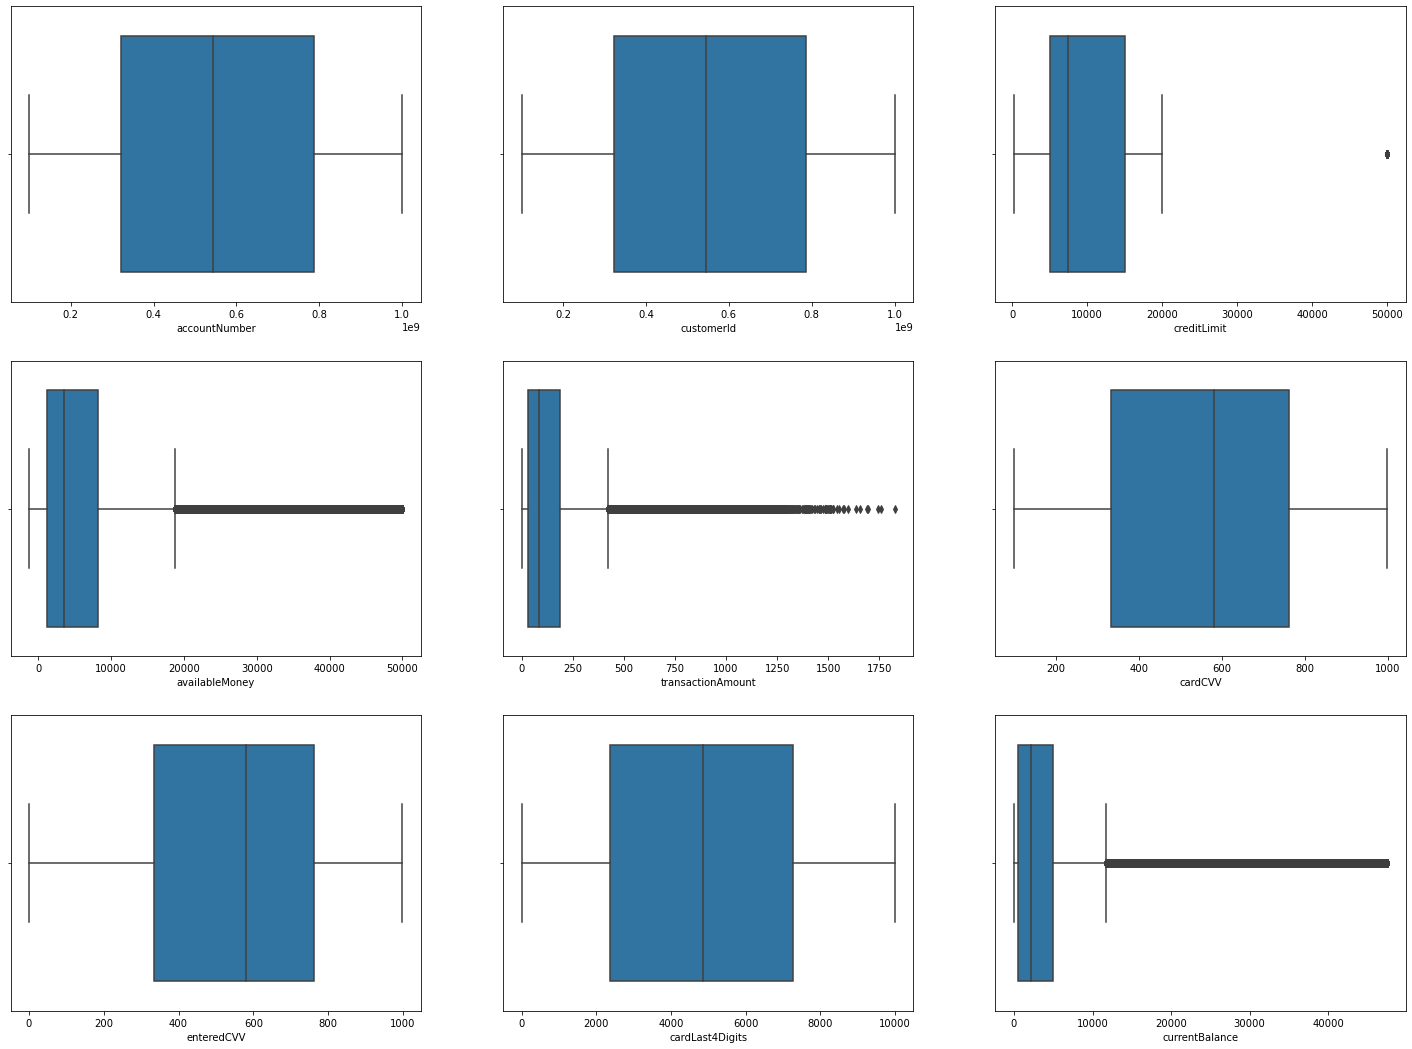

In [13]:
def plot_numerik(df):
    plt.figure(figsize=(25, 25))
    
    for x in range(len(df[numerik].columns)):
        plt.subplot(4,3,x+1)
        sns.boxplot(x=df[numerik].columns[x],
                    data=df[numerik])
plt.show()
print('outlier numerik')
plot_numerik(data)

kolom yang memiliki outlier adalah 'creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance'
dari keempat kolom, yang outlier akan dihilangkan adalah kolom creditLimit karena outliernya dinilai tinggi dan jauh dari kelompok nilai non outlier. sedangkan untuk kolom lainya outlier tidak dihilangkan karena dirasa nilai tersebut dirasa masuk akal dan jarak antara kelompok nilai non outlier dan kelompok nilai outlier tidak terlalu jauh.

In [14]:
#remove outlier pada kolom creditlimit
numerik_upper = ['creditLimit']
def remove_outlier(df):
    for col in df[numerik_upper].columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        cond1 = df[col] > upper
        df[col] = np.where(cond1, upper, df[col])
        
remove_outlier(data)

<AxesSubplot:xlabel='creditLimit'>

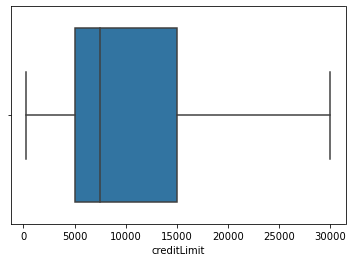

In [15]:
 sns.boxplot(x=data['creditLimit'],
                    data=data)

### Data Exploration

In [18]:
data.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,6.419140e+05,6.419140e+05,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000
mean,5.547701e+08,5.547701e+08,9512.036270,6652.828573,135.162497,557.199927,556.775160,4886.184043,4044.382035
std,2.546884e+08,2.546884e+08,7776.712339,9227.132275,147.053302,257.326204,257.402639,2859.053679,5945.510224
min,1.005471e+08,1.005471e+08,250.000000,-1244.930000,0.000000,100.000000,1.000000,0.000000,0.000000
25%,3.223192e+08,3.223192e+08,5000.000000,1114.970000,32.320000,334.000000,333.000000,2364.000000,502.442500
50%,5.438879e+08,5.438879e+08,7500.000000,3578.165000,85.800000,581.000000,580.000000,4873.000000,2151.860000
75%,7.862277e+08,7.862277e+08,15000.000000,8169.185000,189.030000,762.000000,761.000000,7267.000000,5005.890000
max,9.999853e+08,9.999853e+08,30000.000000,50000.000000,1825.250000,998.000000,998.000000,9998.000000,47496.500000


array([[<AxesSubplot:title={'center':'creditLimit'}>,
        <AxesSubplot:title={'center':'availableMoney'}>,
        <AxesSubplot:title={'center':'transactionAmount'}>,
        <AxesSubplot:title={'center':'currentBalance'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
    

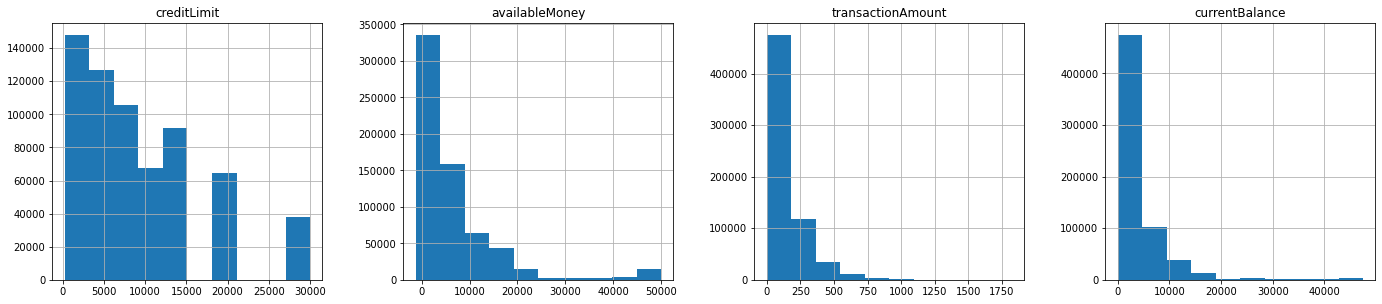

In [19]:
numerik = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
data.hist(column=numerik, figsize=(30,60), layout=(10,5))

 data numerik memiliki right skew dan tidak ada yang berdistribusi normal

In [20]:
kategorik = ['merchantName','acqCountry', 'merchantCountryCode', 'merchantCategoryCode', 'posEntryMode', 'posConditionCode', 'transactionType','isFraud','cardPresent','expirationDateKeyInMatch']
data[kategorik].describe()

,merchantName,acqCountry,merchantCountryCode,merchantCategoryCode,posEntryMode,posConditionCode,transactionType,isFraud,cardPresent,expirationDateKeyInMatch
count,641914,641914,641914,641914,641914.0,641914.0,641914,641914,641914,641914
unique,2493,4,4,19,5.0,3.0,3,2,2,2
top,Lyft,US,US,online_retail,5.0,1.0,PURCHASE,False,False,False
freq,25311,636216,636201,161469,258960.0,514431.0,609274,630612,340453,640945


1. pada kolom merchantname, nama toko yang unik berjumlah 2493. barang yang seri dibeli oleh customer pada toko Lyft
2. customer lebih banyak membeli barang di US
3. customer lebih banyak membeli barang di jenis toko online retail
4. customer lebih banyak jarang hadir saat proses pembelian berlangsung
5. transaksi terbanyak berjenis purchase
4. kebanyakan transaksi bukan penipuan
6. kebanyakan customer tidak membawa kartu saat transaksi
7. expiration date yang tercatat di sistem pada kartu kebanyakan tidak cocok dengan kartu yang tercetak

#### Analisa pada data target

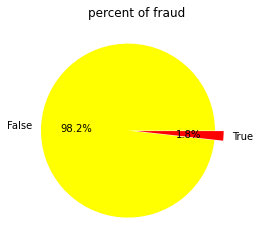

In [21]:
labels = data['isFraud'].value_counts(sort=True).index
sizes = data['isFraud'].value_counts()
colors = ["yellow","red"]
explode = (0.1,0)

plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct='%0.1f%%')
plt.title("percent of fraud")
plt.show()

persentase fraud hanya sebesar 1.8%. lalu data target mengalami imbalance

#### Analisa pada independent  variable

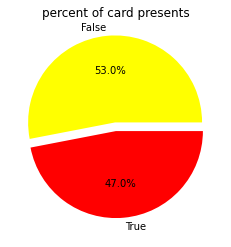

In [24]:
labels = data['cardPresent'].value_counts(sort=True).index
sizes = data['cardPresent'].value_counts()
colors = ["yellow","red"]
explode = (0.1,0)

plt.pie(sizes, explode = explode, labels=labels, colors=colors, autopct='%0.1f%%')
plt.title("percent of card presents")
plt.show()

sebesar 53.0% customer kebanyakan tidak hadir pada saat transaksi berlangsung

<AxesSubplot:xlabel='acqCountry', ylabel='count'>

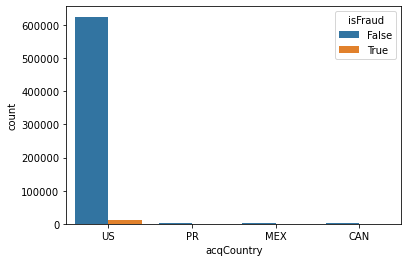

In [19]:
sns.countplot(x='acqCountry', hue='isFraud', data=data)

In [20]:
table=pd.crosstab(data.acqCountry,data.isFraud)
table

isFraud,False,True
acqCountry,,
CAN,1820,50
MEX,2568,58
PR,1170,32
US,625054,11162


negara US memiliki tingkat fraud tinggi dengan jumlah transaksi sebesar 11162

<AxesSubplot:xlabel='posConditionCode', ylabel='count'>

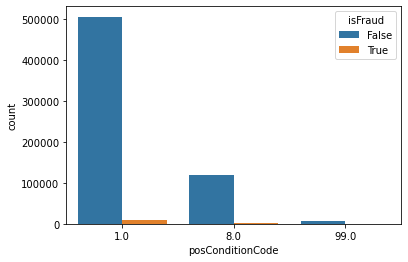

In [21]:
sns.countplot(x='posConditionCode', hue='isFraud', data=data)

In [22]:
table=pd.crosstab(data.posConditionCode,data.isFraud)
table

isFraud,False,True
posConditionCode,,
1.0,505035,9396
8.0,119821,1686
99.0,5756,220


<AxesSubplot:xlabel='transactionType', ylabel='count'>

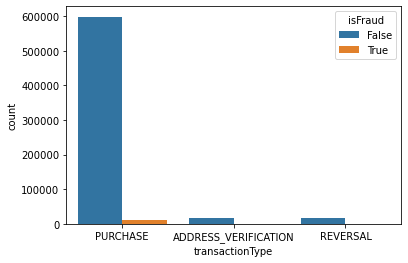

In [23]:
sns.countplot(x='transactionType', hue='isFraud', data=data)

In [24]:
table=pd.crosstab(data.transactionType,data.isFraud)
table

isFraud,False,True
transactionType,,
ADDRESS_VERIFICATION,16391,87
PURCHASE,598352,10922
REVERSAL,15869,293


tipe pembayaran purchase memiliki fraud yang lebih besar dengan nilai 10922 transaksi

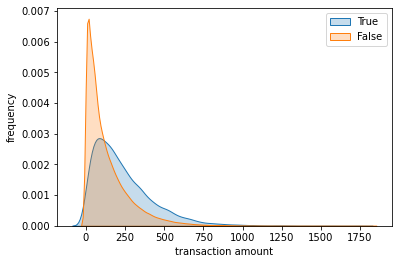

In [25]:
g=sns.kdeplot(data[data['isFraud']==True]['transactionAmount'],shade=True)
g=sns.kdeplot(data[data['isFraud']==False]['transactionAmount'], shade=True)
g.set_xlabel('transaction amount')
g.set_ylabel('frequency')
plt.legend([True, False])
plt.show()

jumlah transaksi berkisar antara 250 - 750 rawan terjadinya fraud

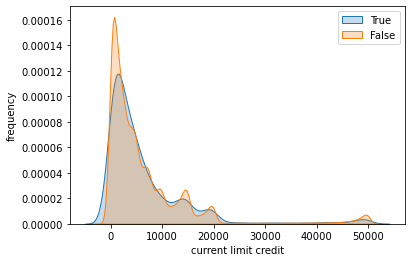

In [30]:
g=sns.kdeplot(data[data['isFraud']==True]['availableMoney'],shade=True)
g=sns.kdeplot(data[data['isFraud']==False]['availableMoney'], shade=True)
g.set_xlabel('current limit credit')
g.set_ylabel('frequency')
plt.legend([True, False])
plt.show()

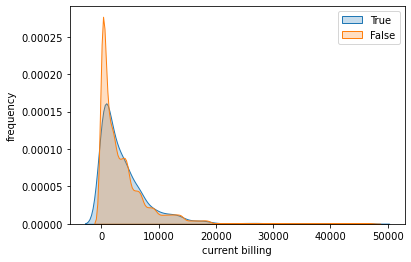

In [31]:
g=sns.kdeplot(data[data['isFraud']==True]['currentBalance'],shade=True)
g=sns.kdeplot(data[data['isFraud']==False]['currentBalance'], shade=True)
g.set_xlabel('current billing')
g.set_ylabel('frequency')
plt.legend([True, False])
plt.show()

### Feature Engineering

In [16]:
tmp_data = data
tmp_data.head(1)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000.0,5000.0,2016-01-08 19:04:50,111.33,Lyft,US,US,5.0,...,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,0.0,False,False


In [17]:
tmp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             641914 non-null  int64         
 1   customerId                641914 non-null  int64         
 2   creditLimit               641914 non-null  float64       
 3   availableMoney            641914 non-null  float64       
 4   transactionDateTime       641914 non-null  datetime64[ns]
 5   transactionAmount         641914 non-null  float64       
 6   merchantName              641914 non-null  object        
 7   acqCountry                641914 non-null  object        
 8   merchantCountryCode       641914 non-null  object        
 9   posEntryMode              641914 non-null  object        
 10  posConditionCode          641914 non-null  object        
 11  merchantCategoryCode      641914 non-null  object        
 12  cu

In [18]:
#mengkalkulasi kolom 'dateoflastadresschange' dan 'transactiondatetime'
tmp_data['DaysSinceLastAdressChange'] = tmp_data['dateOfLastAddressChange'] - tmp_data['transactionDateTime']
tmp_data['DaysSinceLastAdressChange'] = tmp_data['DaysSinceLastAdressChange'] / np.timedelta64(1, 'D')
tmp_data['DaysSinceLastAdressChange']

0        -523.795023
1        -524.939340
2        -526.567303
3        -526.949838
4        -531.070266
             ...    
641909   -396.520382
641910   -401.180961
641911   -408.332211
641912   -411.104572
641913   -420.468218
Name: DaysSinceLastAdressChange, Length: 641914, dtype: float64

In [19]:
tmp_data.head(1)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,DaysSinceLastAdressChange
0,733493772,733493772,5000.0,5000.0,2016-01-08 19:04:50,111.33,Lyft,US,US,5.0,...,2014-08-03,492,492,9184,PURCHASE,True,0.0,False,False,-523.795023


In [20]:
tmp_data['DaysSinceLastAdressChange'].max()

-1.0824074074074075

In [21]:
#menjumlahkan kolom 'expiredDate' dengan 'transactionTime'
tmp_data['daysToExpiration'] = tmp_data['currentExpDate'] - tmp_data['transactionDateTime']
tmp_data['daysToExpiration'] = tmp_data['daysToExpiration'] / np.timedelta64(1, 'D')
tmp_data['daysToExpiration']

0          1544.204977
1          2699.060660
2          4341.432697
3          4981.050162
4          3180.929734
              ...     
641909   -31749.520382
641910     3429.819039
641911     1018.667789
641912     4699.895428
641913     3137.531782
Name: daysToExpiration, Length: 641914, dtype: float64

In [22]:
tmp_data.head(1)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,DaysSinceLastAdressChange,daysToExpiration
0,733493772,733493772,5000.0,5000.0,2016-01-08 19:04:50,111.33,Lyft,US,US,5.0,...,492,492,9184,PURCHASE,True,0.0,False,False,-523.795023,1544.204977


In [23]:
tmp_data[tmp_data['daysToExpiration'] < 0]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,DaysSinceLastAdressChange,daysToExpiration
7,733493772,733493772,5000.0,4191.39,2016-01-26 05:28:24,0.00,Universe Massage #95463,US,US,5.0,...,492,492,9184,ADDRESS_VERIFICATION,False,808.61,False,False,-541.228056,-30737.228056
11,733493772,733493772,5000.0,4137.75,2016-02-04 23:25:31,260.63,Uber,US,US,5.0,...,492,492,9184,PURCHASE,False,862.25,False,False,-550.976053,-31202.976053
15,733493772,733493772,5000.0,3741.64,2016-02-13 18:18:53,36.04,Uber,US,US,9.0,...,492,492,9184,PURCHASE,False,1258.36,False,False,-559.763113,-30846.763113
24,733493772,733493772,5000.0,3461.35,2016-02-26 16:49:35,239.69,Quizno's #353204,US,US,5.0,...,492,492,9184,PURCHASE,False,1538.65,True,False,-572.701100,-31133.701100
26,733493772,733493772,5000.0,3232.00,2016-03-04 04:42:44,105.66,Fresh Online Services,US,US,9.0,...,492,492,9184,PURCHASE,False,1768.00,False,False,-579.196343,-31140.196343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641893,186770399,186770399,7500.0,4392.39,2016-09-10 12:37:13,31.12,Blue Mountain eCards,US,US,9.0,...,127,127,5432,PURCHASE,False,3107.61,False,False,-311.525845,-31179.525845
641898,186770399,186770399,7500.0,4162.50,2016-10-05 00:15:34,5.37,Apple iTunes,US,US,5.0,...,127,127,5432,PURCHASE,False,3337.50,False,False,-336.010810,-31689.010810
641904,186770399,186770399,7500.0,3619.56,2016-11-04 01:33:34,5.37,Apple iTunes,US,US,5.0,...,127,127,5432,PURCHASE,False,3880.44,False,False,-366.064977,-31719.064977
641905,186770399,186770399,7500.0,3614.19,2016-11-07 20:48:59,147.97,Blue Mountain Online Services,US,US,2.0,...,127,127,5432,PURCHASE,False,3885.81,False,False,-369.867350,-31602.867350


ada 97720 recording data dimana proses transaksi dilakukan setelah credit card mengalami expired

In [24]:
#mengekstrak hour,day,month,year dari kolom transactiondatetime
tmp_data['year'] = tmp_data['transactionDateTime'].apply(lambda x:pd.to_datetime(x).year)
tmp_data['month'] = tmp_data['transactionDateTime'].apply(lambda x:pd.to_datetime(x).month)
tmp_data['day'] = tmp_data['transactionDateTime'].apply(lambda x:pd.to_datetime(x).day)

In [25]:
#membuat kolom baru MatchCVV yang berisi, jika cardCVV == enteredCVV maka bernilai true
tmp_data['MatchCVV'] = tmp_data.apply(lambda row:True if row['cardCVV'] == row['enteredCVV'] else False, axis=1)

In [26]:
tmp_data.head(1)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,DaysSinceLastAdressChange,daysToExpiration,year,month,day,MatchCVV
0,733493772,733493772,5000.0,5000.0,2016-01-08 19:04:50,111.33,Lyft,US,US,5.0,...,True,0.0,False,False,-523.795023,1544.204977,2016,1,8,True


In [27]:
tmp_data['MatchCVV'].value_counts()

True     635977
False      5937
Name: MatchCVV, dtype: int64

ada 5937 recording data dimana saat transaksi terjadi, ada perbedaan nilai CVV pada credit card

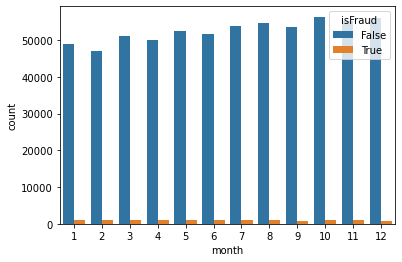

In [28]:
sns.countplot(x='month', hue='isFraud', data=tmp_data)
plt.show()

In [29]:
pd.crosstab(tmp_data.month,tmp_data.isFraud)

isFraud,False,True
month,,
1,48851,993
2,47038,919
3,50985,1017
4,49891,907
5,52527,984
6,51703,932
7,53882,988
8,54662,908
9,53484,873


pada tahun 2016, yang banyak melakukan fraud dibulan ketiga yaitu bulan maret

In [30]:
#Ubah kolom yang berisi True / False menjadi 0 / 1
binary_col = ['isFraud', 'cardPresent', 'expirationDateKeyInMatch', 'MatchCVV']

for col in binary_col:
    tmp_data[col] = tmp_data[col].apply(lambda row:1 if row == True else 0)

In [31]:
tmp_data.head(1)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,DaysSinceLastAdressChange,daysToExpiration,year,month,day,MatchCVV
0,733493772,733493772,5000.0,5000.0,2016-01-08 19:04:50,111.33,Lyft,US,US,5.0,...,1,0.0,0,0,-523.795023,1544.204977,2016,1,8,1


### Feature Selection

In [32]:
from scipy.stats import chi2_contingency

In [33]:
char_column = ['merchantName','acqCountry', 'merchantCountryCode', 'merchantCategoryCode', 'posEntryMode', 'posConditionCode', 'transactionType']

pi_array, chi_array = [], []

for column in char_column:
    crosstab = pd.crosstab(tmp_data[column], tmp_data['isFraud'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi_array.append(chi2)
    pi_array.append(p)
    
df_chi = pd.DataFrame({'Variable':char_column,
                       'chi_square':chi_array,
                       'P-Value':pi_array})

df_chi

,Variable,chi_square,P-Value
0,merchantName,6890.183287,0.000000e+00
1,acqCountry,17.853153,4.716113e-04
2,merchantCountryCode,21.618955,7.829090e-05
3,merchantCategoryCode,1717.856308,0.000000e+00
4,posEntryMode,2313.799914,0.000000e+00
5,posConditionCode,238.129319,1.953779e-52
6,transactionType,148.612523,5.360443e-33


kolom yang memiliki hubungan dengan target variable yaitu 'acCountry', 'merchantCountryCode', 'posConditionCode', 'transactionType'

### One hot encoding

In [34]:
def nominal(df, col):
    dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummies], axis=1)
    return df

tmp_data = nominal(tmp_data, 'acqCountry')
tmp_data = nominal(tmp_data, 'merchantCountryCode')
tmp_data = nominal(tmp_data, 'posConditionCode')
tmp_data = nominal(tmp_data, 'transactionType')

In [35]:
tmp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 43 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   accountNumber                         641914 non-null  int64         
 1   customerId                            641914 non-null  int64         
 2   creditLimit                           641914 non-null  float64       
 3   availableMoney                        641914 non-null  float64       
 4   transactionDateTime                   641914 non-null  datetime64[ns]
 5   transactionAmount                     641914 non-null  float64       
 6   merchantName                          641914 non-null  object        
 7   acqCountry                            641914 non-null  object        
 8   merchantCountryCode                   641914 non-null  object        
 9   posEntryMode                          641914 non-null  obje

In [36]:
#drop kolom tidak perlu
cols = ['accountNumber', 'customerId', 'acqCountry', 'merchantCountryCode', 'posConditionCode', 'transactionType']

for col in cols:
    tmp_data = tmp_data.drop(col, axis=1)

In [37]:
tmp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 37 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   creditLimit                           641914 non-null  float64       
 1   availableMoney                        641914 non-null  float64       
 2   transactionDateTime                   641914 non-null  datetime64[ns]
 3   transactionAmount                     641914 non-null  float64       
 4   merchantName                          641914 non-null  object        
 5   posEntryMode                          641914 non-null  object        
 6   merchantCategoryCode                  641914 non-null  object        
 7   currentExpDate                        641914 non-null  datetime64[ns]
 8   accountOpenDate                       641914 non-null  datetime64[ns]
 9   dateOfLastAddressChange               641914 non-null  date

In [38]:
#drop kolom tidak perlu
cols = ['transactionDateTime', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits']

for col in cols:
    tmp_data = tmp_data.drop(col, axis=1)

In [39]:
tmp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 30 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   creditLimit                           641914 non-null  float64
 1   availableMoney                        641914 non-null  float64
 2   transactionAmount                     641914 non-null  float64
 3   merchantName                          641914 non-null  object 
 4   posEntryMode                          641914 non-null  object 
 5   merchantCategoryCode                  641914 non-null  object 
 6   isFraud                               641914 non-null  int64  
 7   currentBalance                        641914 non-null  float64
 8   cardPresent                           641914 non-null  int64  
 9   expirationDateKeyInMatch              641914 non-null  int64  
 10  DaysSinceLastAdressChange             641914 non-null  float64
 11  

In [40]:
#drop kolom tidak perlu
cols = ['posEntryMode', 'merchantCategoryCode']

for col in cols:
    tmp_data = tmp_data.drop(col, axis=1)

In [41]:
tmp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 28 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   creditLimit                           641914 non-null  float64
 1   availableMoney                        641914 non-null  float64
 2   transactionAmount                     641914 non-null  float64
 3   merchantName                          641914 non-null  object 
 4   isFraud                               641914 non-null  int64  
 5   currentBalance                        641914 non-null  float64
 6   cardPresent                           641914 non-null  int64  
 7   expirationDateKeyInMatch              641914 non-null  int64  
 8   DaysSinceLastAdressChange             641914 non-null  float64
 9   daysToExpiration                      641914 non-null  float64
 10  year                                  641914 non-null  int64  
 11  

In [42]:
#drop kolom tidak perlu
tmp_data = tmp_data.drop(['merchantName'], axis=1)

In [43]:
tmp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 27 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   creditLimit                           641914 non-null  float64
 1   availableMoney                        641914 non-null  float64
 2   transactionAmount                     641914 non-null  float64
 3   isFraud                               641914 non-null  int64  
 4   currentBalance                        641914 non-null  float64
 5   cardPresent                           641914 non-null  int64  
 6   expirationDateKeyInMatch              641914 non-null  int64  
 7   DaysSinceLastAdressChange             641914 non-null  float64
 8   daysToExpiration                      641914 non-null  float64
 9   year                                  641914 non-null  int64  
 10  month                                 641914 non-null  int64  
 11  

#### Smote

In [44]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter

Fraud


<function matplotlib.pyplot.show(close=None, block=None)>

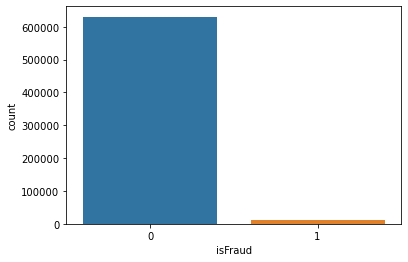

In [45]:
sns.countplot(x='isFraud', data=tmp_data)
print("Fraud")
plt.show

In [46]:
df = tmp_data
df.head()

,creditLimit,availableMoney,transactionAmount,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,DaysSinceLastAdressChange,daysToExpiration,year,...,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US,posConditionCode_1.0,posConditionCode_8.0,posConditionCode_99.0,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL
0,5000.0,5000.00,111.33,1,0.00,0,0,-523.795023,1544.204977,2016,...,0,0,0,1,1,0,0,0,1,0
1,5000.0,4888.67,24.75,0,111.33,0,0,-524.939340,2699.060660,2016,...,0,0,0,1,1,0,0,0,1,0
2,5000.0,4863.92,187.40,0,136.08,0,0,-526.567303,4341.432697,2016,...,0,0,0,1,1,0,0,0,1,0
3,5000.0,4676.52,227.34,1,323.48,0,0,-526.949838,4981.050162,2016,...,0,0,0,1,1,0,0,0,1,0
4,5000.0,4449.18,0.00,0,550.82,0,0,-531.070266,3180.929734,2016,...,0,0,0,1,1,0,0,1,0,0


In [47]:
X=df.drop(columns=['isFraud'])
y=df['isFraud']
print('before sampling :', Counter(y))

sampling = SMOTE(sampling_strategy=0.6)
X_smote, y_smote = sampling.fit_resample(X, y)
print('after sampling ', Counter(y_smote))

tmp_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)

before sampling : Counter({0: 630612, 1: 11302})
after sampling  Counter({0: 630612, 1: 378367})


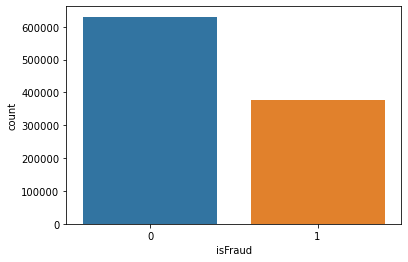

In [48]:
sns.countplot(x='isFraud', data=tmp_data)
plt.show()

### Modelling

In [49]:
X = tmp_data.drop(columns=['isFraud'])
y = tmp_data['isFraud']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

X_train_scaled = rs.fit_transform(X_train)
X_test_scaled = rs.fit_transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [53]:
print(X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape)

(807183, 26) (807183,) (201796, 26) (201796,)


### Library

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
def classification_eval(aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    
    accuracy = round((tp+tn)/(tp+tn+fp+fn) *100,2)
    precision = round((tp)/(tp+fp)*100, 2)
    recall = round((tp)/(tp+fn)*100, 2)
    
    print("evaluation model", name)
    print(cm)
    print("accuracy:", accuracy, "%")
    print("precision:", precision, "%")
    print("recall:", recall, "%")

### Logistic Regression

In [56]:
LR=LogisticRegression()
LR.fit(X_train_scaled, y_train)

LogisticRegression()

In [57]:
y_train_pred = LR.predict(X_train_scaled)
y_test_pred = LR.predict(X_test_scaled)

In [58]:
classification_eval(y_train, y_train_pred, 'LR Training')

evaluation model LR Training
[[466422  38063]
 [137912 164786]]
accuracy: 78.2 %
precision: 81.24 %
recall: 54.44 %


In [59]:
classification_eval(y_test, y_test_pred, 'LR Test')

evaluation model LR Test
[[116488   9639]
 [ 34600  41069]]
accuracy: 78.08 %
precision: 80.99 %
recall: 54.27 %


In [60]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84    126127
           1       0.81      0.54      0.65     75669

    accuracy                           0.78    201796
   macro avg       0.79      0.73      0.75    201796
weighted avg       0.79      0.78      0.77    201796



berdasarkan model testing logistic regression didapatkan bahwa :
1. Akurasi sebesar 78.08%
2. precision sebesar 80.99%
3. recall sebesar 54.27%
4. model ini belum dianggap berhasil karena presentase recall yang rendah

### Decision Tree

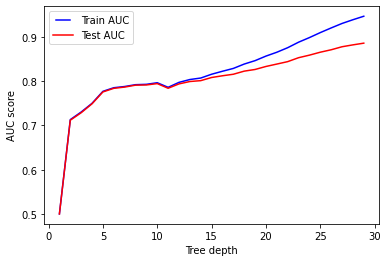

In [61]:
from sklearn.metrics import roc_curve, auc

train_results = []
test_results = []
for i in range(1, 30):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    #prediksi data train dan hitung roc pada data train
    train_predict = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_predict)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    #add roc_auc to train results
    train_results.append(roc_auc)
    #prediksi data test dan hitung roc pada data test
    test_predict = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_predict)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    #add roc_auc to test_results
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(range(1, 30), train_results, 'b', label='Train AUC')
line2, = plt.plot(range(1, 30), test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [62]:
dectree = DecisionTreeClassifier(max_depth=25)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25)

In [63]:
y_pred_train_DT = dectree.predict(X_train)
y_pred_test_DT = dectree.predict(X_test)

In [64]:
classification_eval(y_train, y_pred_train_DT, 'DT Training')

evaluation model DT Training
[[451251  53234]
 [ 22636 280062]]
accuracy: 90.6 %
precision: 84.03 %
recall: 92.52 %


In [65]:
classification_eval(y_test, y_pred_test_DT, 'DT Test')

evaluation model DT Test
[[107574  18553]
 [  9188  66481]]
accuracy: 86.25 %
precision: 78.18 %
recall: 87.86 %


In [66]:
print(classification_report(y_test, y_pred_test_DT))

              precision    recall  f1-score   support

           0       0.92      0.85      0.89    126127
           1       0.78      0.88      0.83     75669

    accuracy                           0.86    201796
   macro avg       0.85      0.87      0.86    201796
weighted avg       0.87      0.86      0.86    201796



berdasarkan model decision tree didapatkan bahwa :
1. Akurasi sebesar 86.25%
2. precision sebesar 78.18%
3. recall sebesar 87.86%
4. model ini dianggap berhasil dalam memprediksi fraud karena keakuratan dalam memprediksi fraud dari data actual sebesar 87.86%

### Random Forest

In [67]:
ranfor = RandomForestClassifier(max_depth=25)
ranfor.fit(X_train, y_train)

RandomForestClassifier(max_depth=25)

In [68]:
y_pred_train_RF = ranfor.predict(X_train)
y_pred_test_RF = ranfor.predict(X_test)

In [69]:
classification_eval(y_train, y_pred_train_RF, 'RF Training')

evaluation model RF Training
[[457623  46862]
 [ 20572 282126]]
accuracy: 91.65 %
precision: 85.76 %
recall: 93.2 %


In [70]:
classification_eval(y_test, y_pred_test_RF, 'DT Test')

evaluation model DT Test
[[112663  13464]
 [  9591  66078]]
accuracy: 88.58 %
precision: 83.07 %
recall: 87.33 %


In [71]:
print(classification_report(y_test, y_pred_test_RF))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91    126127
           1       0.83      0.87      0.85     75669

    accuracy                           0.89    201796
   macro avg       0.88      0.88      0.88    201796
weighted avg       0.89      0.89      0.89    201796



berdasarkan model random forest didapatkan bahwa :
1. accuracy sebesar 88.58%
2. precision sebesar 83.07%
3. recall sebesar 87.33%
4. model ini dianggap berhasil dalam memprediksi fraud karena keakuratan memprediksi fraud dari data actual sebesar 87.33%